# Table of Contents

- [Import Libraries](#section1)
- [load Datasets](#section2)
- [Preprocessing Users DataFrame](#section3)
- [Preprocessing Movies DataFrame](#section4)
- [Preprocessing Movies aspects sentiment](#section5)
- [Merging features into the test and training DataFrames](#section6)


## 1. Import necessary libraries <a id="section1"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import ast
import pandas as pd
from collections import Counter
from sentence_transformers import SentenceTransformer

## 2. Load Datasets <a id="section2"></a>

In [2]:
users = pd.read_csv("./Data/users_info.csv", index_col=0)
movies = pd.read_csv("./Data/movies_info.csv", index_col=0)
aspects = pd.read_csv("./Data/aspects_sentiment.csv", index_col=0)
test = pd.read_csv("C:/Users/melika/Desktop/master/Lisa_Thesis/Thesis/out-of-peirod/test_out_of_period.csv", index_col=0)
train = pd.read_csv("C:/Users/melika/Desktop/master/Lisa_Thesis/Thesis/out-of-peirod/training_out_of_period.csv", index_col=0)
val = pd.read_csv("C:/Users/melika/Desktop/master/Lisa_Thesis/Thesis/out-of-peirod/validation_out_of_period.csv", index_col=0)
train_val = pd.read_csv("C:/Users/melika/Desktop/master/Lisa_Thesis/Thesis/out-of-peirod/Train_Big_out_of_period.csv", index_col=0)


## 3. Preprocessing Users DataFrame <a id="section3"></a>

In [3]:
users.head()

,username,watchlist_length,favorites,films_watched,films_this_year,lists_created,following,followers
0,dustymoth,72,"['Withnail & I', 'Eraserhead', 'The Naked Civi...",2402,48,84,32,26
1,gogor,67,"['Everything Everywhere All at Once', 'Rebel W...",2575,51,62,47,49
2,tomato33,0,"['Camera Buff', 'The Empire Strikes Back', 'Fr...",108,10,3,4,3
3,areyoujoebanks,118,"[""It's a Wonderful Life"", 'Twin Peaks: The Ret...",711,36,0,128,77
4,glynk,2,"['Mr. Smith Goes to Washington', 'Your Name.',...",2372,98,0,3,0


In [4]:
users.dtypes

username            object
watchlist_length     int64
favorites           object
films_watched        int64
films_this_year      int64
lists_created        int64
following            int64
followers            int64
dtype: object

In [5]:
users.describe()

,watchlist_length,films_watched,films_this_year,lists_created,following,followers
count,6400.000000,6400.00000,6400.000000,6400.000000,6400.000000,6400.000000
mean,635.730937,1345.48000,53.965313,20.129844,134.965000,163.253594
std,1668.946867,1792.00519,74.213204,87.978200,691.455881,790.252348
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,28.750000,316.00000,15.000000,0.000000,11.000000,10.000000
50%,158.000000,749.00000,34.000000,4.000000,29.000000,27.000000
75%,560.250000,1641.50000,71.000000,16.000000,82.000000,84.000000
max,34046.000000,23454.00000,1926.000000,4509.000000,34485.000000,31275.000000


#### Let's identify the outliers in each column

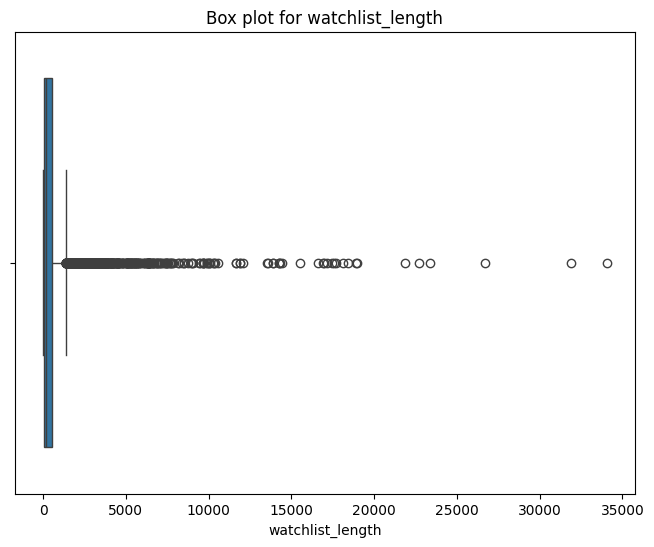

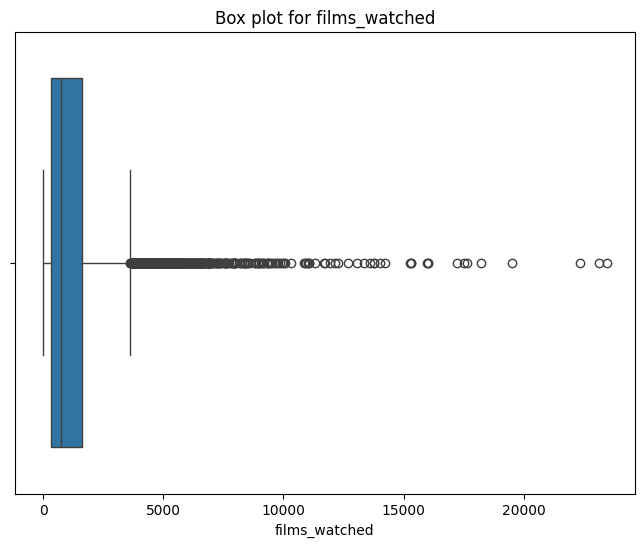

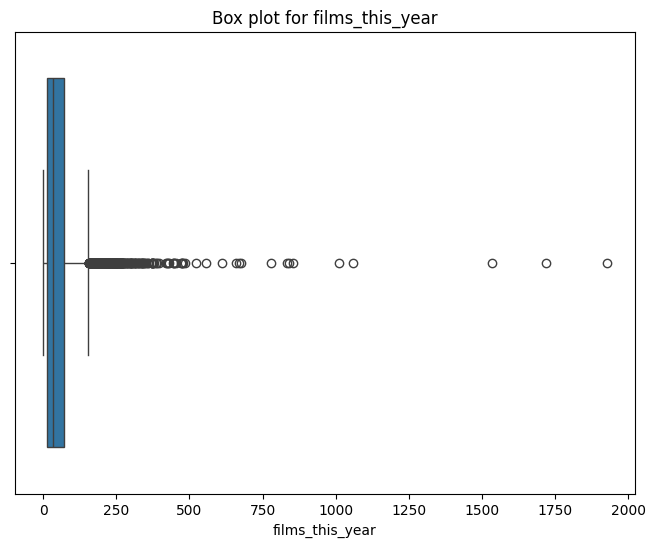

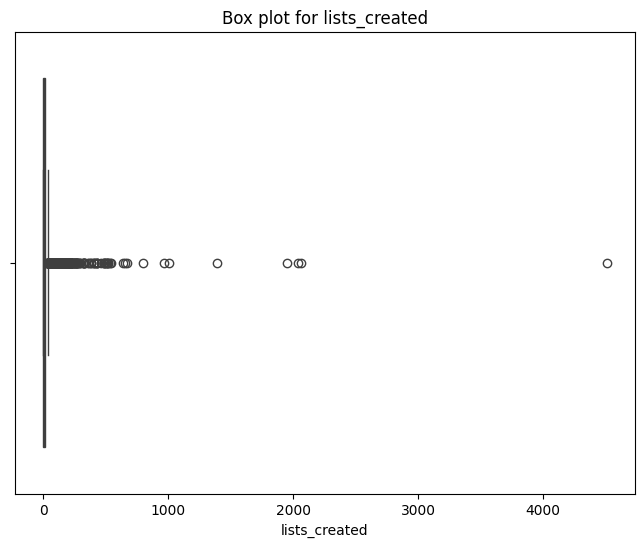

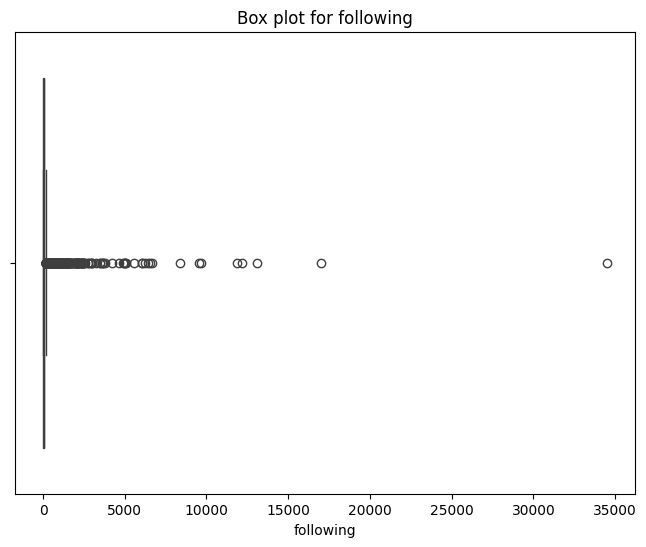

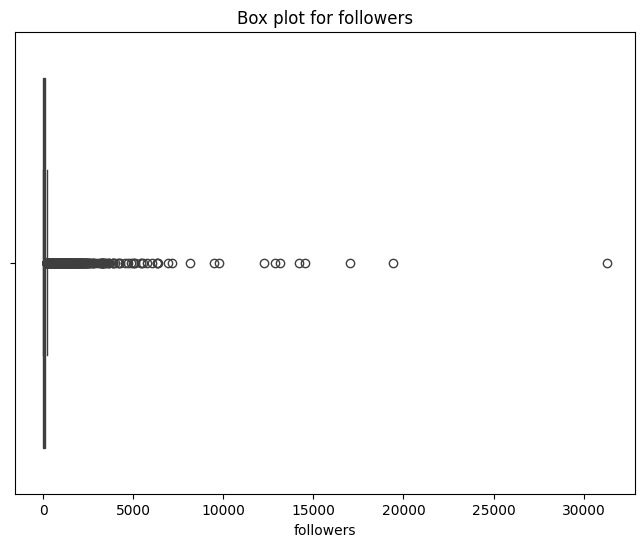

In [6]:
# Loop through each column in the DataFrame
for column in users.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=users[column])
    plt.title(f'Box plot for {column}')
    plt.show()


#### Calculate the Z-score for each column.

#### 1.Identify the outliers (Z-score > 3 or Z-score < -3).

#### 2.Replace the outliers with the maximum value within the range (upper threshold).

In [7]:
# Iterate over each numeric column in the DataFrame
for column in users.select_dtypes(include=['number']).columns:
    # Calculate Z-scores for the column
    z_scores = np.abs(stats.zscore(users[column]))
    
    # Define the threshold for outliers
    outliers = z_scores > 3
    
    # Replace outliers with the upper threshold (max value within the range)
    upper_threshold = users[column].quantile(0.95) 

    # Replace outliers
    users[column] = np.where(outliers, upper_threshold, users[column])


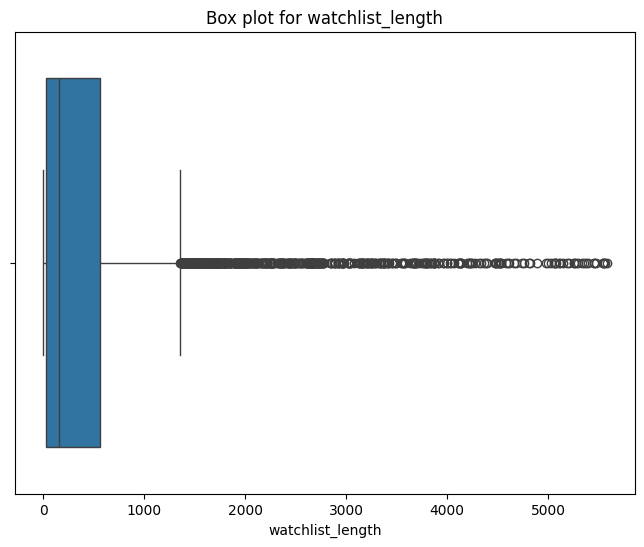

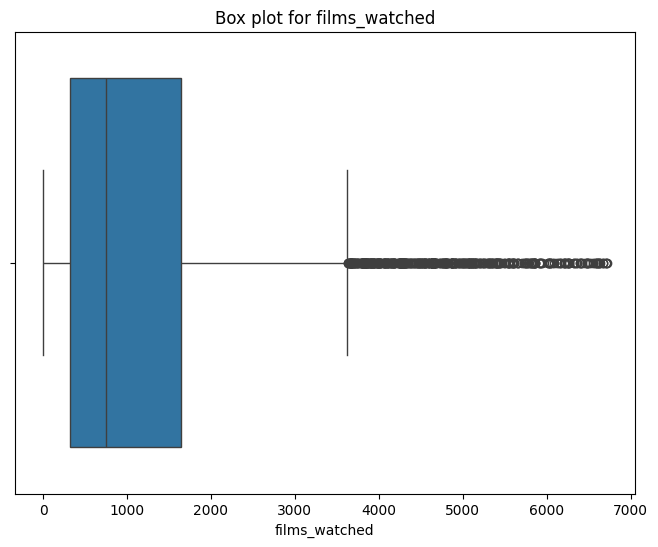

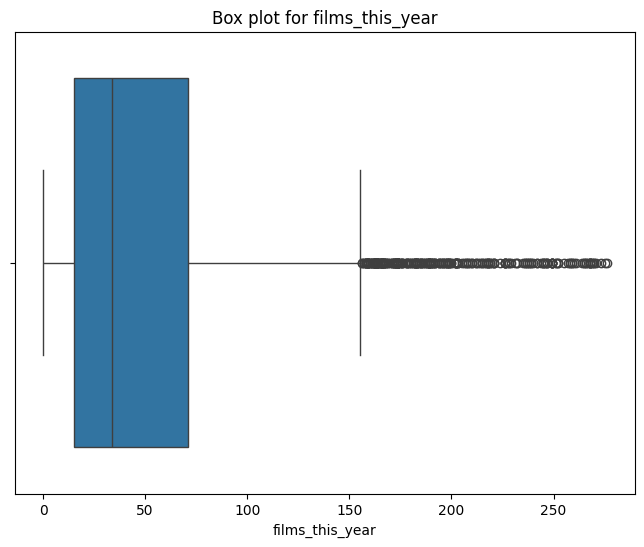

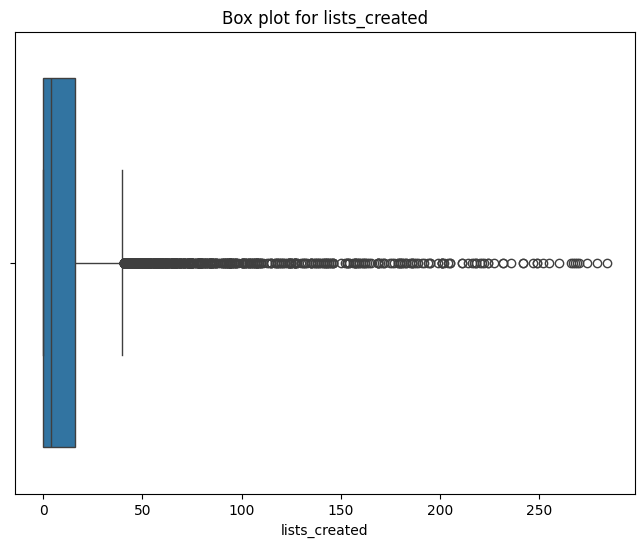

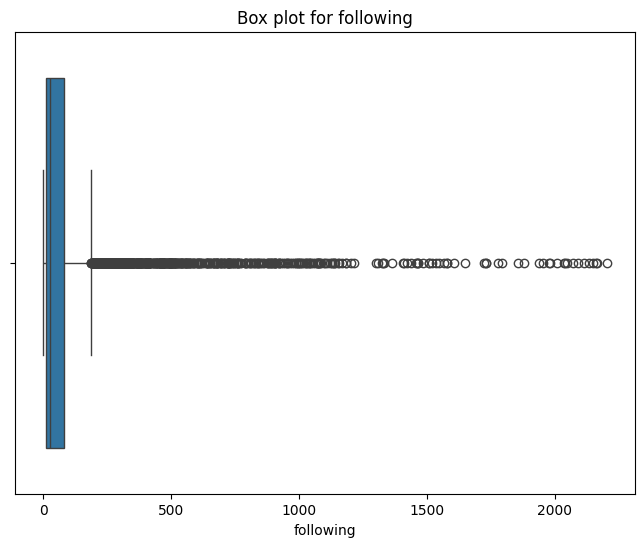

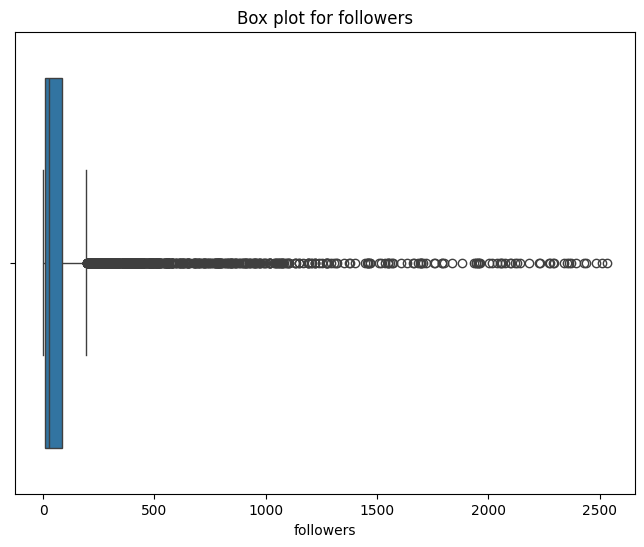

In [8]:
# Loop through each column in the DataFrame
for column in users.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=users[column])
    plt.title(f'Box plot for {column}')
    plt.show()


In [9]:
users.describe()

,watchlist_length,films_watched,films_this_year,lists_created,following,followers
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,504.323828,1245.251891,50.296563,16.000016,97.017508,113.328187
std,844.326557,1329.779159,49.430795,32.357659,211.959521,262.437949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.750000,316.000000,15.000000,0.000000,11.000000,10.000000
50%,158.000000,749.000000,34.000000,4.000000,29.000000,27.000000
75%,560.250000,1641.500000,71.000000,16.000000,82.000000,84.000000
max,5581.000000,6713.000000,276.000000,284.000000,2203.000000,2531.000000


In [10]:
#drop favorites col for now
users=users.drop(columns=["favorites"])

In [11]:
users.head()

,username,watchlist_length,films_watched,films_this_year,lists_created,following,followers
0,dustymoth,72.0,2402.0,48.0,84.0,32.0,26.0
1,gogor,67.0,2575.0,51.0,62.0,47.0,49.0
2,tomato33,0.0,108.0,10.0,3.0,4.0,3.0
3,areyoujoebanks,118.0,711.0,36.0,0.0,128.0,77.0
4,glynk,2.0,2372.0,98.0,0.0,3.0,0.0


## 4. Preprocessing Movies DataFrame <a id="section4"></a>

In [12]:
movies.head()

,title,url,directors,rating,year,genres,country,studio,language,watch_count,fan_count,like_count,review_count,list_count,cast_info,summary
0,jfk,https://letterboxd.com/film/jfk/,['Oliver Stone'],4.05 out of 5,1991.0,"['Drama', 'History', 'Thriller']","['USA', 'France']","['Warner Bros. Pictures', 'Regency Enterprises...","['English', 'English', 'Spanish']","173,490","1,041","42,468","21,290","56,259",{'Kevin Costner': 'https://letterboxd.com/acto...,Follows the investigation into the assassinati...
1,salems-lot-2024,https://letterboxd.com/film/salems-lot-2024/,['Gary Dauberman'],2.39 out of 5,2024.0,['Horror'],['USA'],"['New Line Cinema', 'Atomic Monster', 'Vertigo...",['English'],"104,715",16,"14,213","32,580","27,655",{'Lewis Pullman': 'https://letterboxd.com/acto...,Author Ben Mears returns to his childhood home...
2,alien-3,https://letterboxd.com/film/alien-3/,['David Fincher'],2.82 out of 5,1992.0,"['Horror', 'Science Fiction', 'Action']",['USA'],"['20th Century Fox', 'Brandywine Productions']",['English'],"487,939",269,"68,239","61,964","116,891",{'Sigourney Weaver': 'https://letterboxd.com/a...,After escaping with Newt and Hicks from the al...
3,lock-stock-and-two-smoking-barrels,https://letterboxd.com/film/lock-stock-and-two...,['Guy Ritchie'],3.99 out of 5,1998.0,"['Comedy', 'Crime']","['UK', 'USA']","['The Steve Tisch Company', 'SKA Films', 'Hand...",['English'],"363,721","3,624","96,479","21,158","55,552",{'Vinnie Jones': 'https://letterboxd.com/actor...,A card shark and his unwillingly-enlisted frie...
4,morocco,https://letterboxd.com/film/morocco/,['Josef von Sternberg'],3.58 out of 5,1930.0,"['Romance', 'Drama']",['USA'],['Paramount Pictures'],"['English', 'Arabic', 'English', 'French', 'It...","19,531",63,"4,734","3,366","16,305",{'Gary Cooper': 'https://letterboxd.com/actor/...,"Mogador, Morocco. Late 1920s. A complex romanc..."


In [13]:
movies.dtypes

title            object
url              object
directors        object
rating           object
year            float64
genres           object
country          object
studio           object
language         object
watch_count      object
fan_count        object
like_count       object
review_count     object
list_count       object
cast_info        object
summary          object
dtype: object

### 4.1 'watch_count', 'fan_count', 'like_count', 'review_count', 'list_count'

In [14]:
# List of columns that should be converted to integers
count_columns = ['watch_count', 'fan_count', 'like_count', 'review_count', 'list_count']

# Convert each column to numeric, coercing errors (non-numeric) to NaN, then replace NaNs with 0 or any suitable value
for column in count_columns:
    movies[column] = pd.to_numeric(movies[column].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Check the result
print(movies[count_columns].dtypes)


watch_count     int32
fan_count       int32
like_count      int32
review_count    int32
list_count      int32
dtype: object


In [15]:
movies.describe()

,year,watch_count,fan_count,like_count,review_count,list_count
count,9106.000000,9.113000e+03,9113.000000,9.113000e+03,9.113000e+03,9113.000000
mean,1999.700198,2.310889e+05,2062.353451,5.811474e+04,2.423638e+04,36061.133875
std,23.482400,4.977833e+05,9911.061893,1.627828e+05,5.400260e+04,60747.783001
min,1874.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1987.000000,1.536400e+04,14.000000,3.122000e+03,2.580000e+03,5456.000000
50%,2007.000000,6.015400e+04,119.000000,1.222500e+04,7.850000e+03,15524.000000
75%,2019.000000,2.015510e+05,701.000000,3.887700e+04,2.172900e+04,38337.000000
max,2024.000000,5.175217e+06,324483.000000,2.722910e+06,1.000911e+06,801787.000000


### 4.2 Rating 

In [16]:
# Replace 'None found' with NaN, then convert to float
movies['rating'] = (
    movies['rating']
    .str.replace(' out of 5', '', regex=False)  # Remove text
    .replace('None found', np.nan)  # Replace invalid values
    .astype(float)  # Convert to float
)

movies[['rating']].head()

,rating
0,4.05
1,2.39
2,2.82
3,3.99
4,3.58


In [17]:
movies[['rating']].describe()

,rating
count,8827.000000
mean,3.330109
std,0.586302
min,0.870000
25%,2.960000
50%,3.400000
75%,3.760000
max,4.710000


array([[<Axes: title={'center': 'rating'}>]], dtype=object)

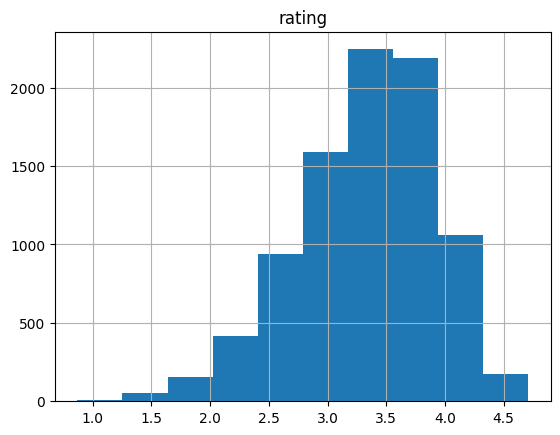

In [18]:
movies[['rating']].hist()

In [19]:
movies.dtypes

title            object
url              object
directors        object
rating          float64
year            float64
genres           object
country          object
studio           object
language         object
watch_count       int32
fan_count         int32
like_count        int32
review_count      int32
list_count        int32
cast_info        object
summary          object
dtype: object

### 4.3 Year

In [20]:
# Count unique values in the 'year' column
number_unique_years = movies['year'].nunique()
unique_years = movies['year'].unique()

print(f"Number of unique years: {number_unique_years}")
print(f"Unique years: {unique_years}")

Number of unique years: 125
Unique years: [1991. 2024. 1992. 1998. 1930. 1985. 2007. 1996. 2023. 2002. 1975. 2001.
 1997. 1960. 2013. 1973. 1974. 1989. 2014. 1990. 2020. 2009. 2012. 2008.
 1982. 2022. 2019. 2005. 1972. 2018. 2015. 2000. 2003. 1988. 1994. 1995.
 2021. 1999. 2011. 1956. 2004. 1931. 2010. 1941. 1984. 1993. 1987. 2017.
 1978. 1986. 2006. 1980. 1983. 1958. 1977. 1981. 1976. 2016. 1946. 1966.
 1932. 1962. 1970. 1964. 1933. 1968. 1959. 1947. 1944. 1945. 1934. 1949.
 1963. 1948. 1950. 1967. 1979. 1953. 1971. 1954. 1939. 1942. 1935. 1922.
 1943. 1936. 1927. 1940. 1926. 1925. 1923. 1961. 1951. 1957. 1929. 1955.
 1952. 1938. 1937. 1965. 1969. 1902. 1906. 1898. 1911. 1910. 1928. 1918.
 1920. 1924. 1903. 1896. 1895. 1915. 1888. 1878. 1921. 1916.   nan 1909.
 1913. 1901. 1894. 1874. 1904. 1897.]


In [21]:
# na value
movies['year'].isna().sum()

7

In [22]:
# drop them
movies = movies.dropna(subset=['year'])

In [23]:
# Create a new column 'decade' based on 'year'
movies['decade'] = (movies['year'] // 10) * 10

# 'decade' as a categorical variable (optional)
movies['decade'] = movies['decade'].astype('category').astype(int)

movies['year'] = movies['year'].astype(int)

# Print the result
movies[['year', 'decade']].head()


,year,decade
0,1991,1990
1,2024,2020
2,1992,1990
3,1998,1990
4,1930,1930


In [24]:
movies['decade'].unique()

array([1990, 2020, 1930, 1980, 2000, 1970, 1960, 2010, 1950, 1940, 1920,
       1900, 1890, 1910, 1880, 1870])

<Axes: >

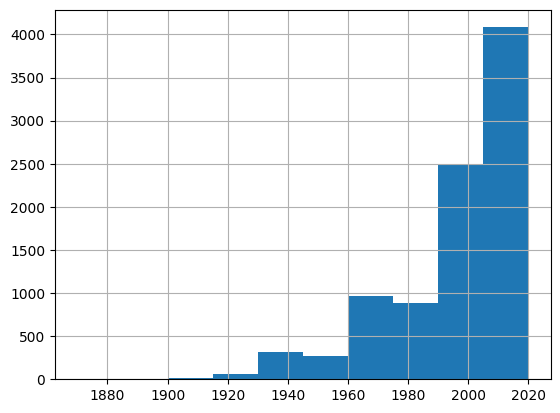

In [25]:
movies['decade'].hist()

### 4.4 genres

In [26]:
movies['genres'] = movies['genres'].apply(ast.literal_eval)

In [27]:
# Create a list of all unique genres across the 'Language' column
all_genres = set([genre for sublist in movies['genres'] for genre in sublist])
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [28]:
# Create new columns for each genre
for genre in all_genres:
    column_name = f'genre_{genre.lower()}'
    movies[column_name] = movies['genres'].apply(lambda x: 1 if genre in x else 0)

In [29]:
movies.head(2)

,title,url,directors,rating,year,genres,country,studio,language,watch_count,...,genre_crime,genre_music,genre_family,genre_history,genre_thriller,genre_science fiction,genre_romance,genre_tv movie,genre_documentary,genre_mystery
0,jfk,https://letterboxd.com/film/jfk/,['Oliver Stone'],4.05,1991,"[Drama, History, Thriller]","['USA', 'France']","['Warner Bros. Pictures', 'Regency Enterprises...","['English', 'English', 'Spanish']",173490,...,0,0,0,1,1,0,0,0,0,0
1,salems-lot-2024,https://letterboxd.com/film/salems-lot-2024/,['Gary Dauberman'],2.39,2024,[Horror],['USA'],"['New Line Cinema', 'Atomic Monster', 'Vertigo...",['English'],104715,...,0,0,0,0,0,0,0,0,0,0


### 4.5 country,studio,language

In [30]:
# convert to list
movies['country'] = movies['country'].apply(ast.literal_eval)
movies['studio'] = movies['studio'].apply(ast.literal_eval)
movies['language'] = movies['language'].apply(ast.literal_eval)

In [31]:
# Function to extract unique items from a list of lists
def get_unique_items(column_data):
    return set([item for sublist in column_data for item in sublist if isinstance(sublist, list)])

# Get unique items for each column
unique_items_country = get_unique_items(movies['country'])
unique_items_studio = get_unique_items(movies['studio'])
unique_items_language = get_unique_items(movies['language'])

# Print the length of unique items for each column
print("Number of unique items in country:", len(unique_items_country))
print("Number of unique items in studio:", len(unique_items_studio))
print("Number of unique items in language:", len(unique_items_language))


Number of unique items in country: 98
Number of unique items in studio: 9631
Number of unique items in language: 116


1.Calculate the frequency of each item in the column.

2.Identify the cumulative percentage of items.

3.Select the items that contribute to the first 80% of the occurrences (top 20% of the items).

4.Replace the remaining items with "Other".

5.one-hot encode these categories

In [32]:
def process_column(df, column_name):
    # Step 1: Flatten the column and count occurrences
    all_items = [item for sublist in df[column_name] for item in sublist if isinstance(sublist, list)]
    counts = Counter(all_items)  # Count occurrences
    
    # Step 2: Calculate the cumulative percentage of counts
    total_count = sum(counts.values())
    sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)  # Sort by frequency
    
    cumulative_sum = 0
    selected_items = set()
    
    # Step 3: Select items that contribute to 80% of the occurrences
    for item, count in sorted_items:
        cumulative_sum += count
        if cumulative_sum / total_count <= 0.8:
            selected_items.add(item)
        else:
            break
    
    # Step 4: Replace infrequent items with "Other"
    df[column_name] = df[column_name].apply(lambda x: [item if item in selected_items else 'Other' for item in x])
    

    return df




In [33]:
#use function for all columns
movies = process_column(movies, 'country')
movies = process_column(movies, 'studio')
movies = process_column(movies, 'language')
movies.head()

,title,url,directors,rating,year,genres,country,studio,language,watch_count,...,genre_crime,genre_music,genre_family,genre_history,genre_thriller,genre_science fiction,genre_romance,genre_tv movie,genre_documentary,genre_mystery
0,jfk,https://letterboxd.com/film/jfk/,['Oliver Stone'],4.05,1991,"[Drama, History, Thriller]","[USA, France]","[Warner Bros. Pictures, Regency Enterprises, A...","[English, English, Spanish]",173490,...,0,0,0,1,1,0,0,0,0,0
1,salems-lot-2024,https://letterboxd.com/film/salems-lot-2024/,['Gary Dauberman'],2.39,2024,[Horror],[USA],"[New Line Cinema, Atomic Monster, Vertigo Ente...",[English],104715,...,0,0,0,0,0,0,0,0,0,0
2,alien-3,https://letterboxd.com/film/alien-3/,['David Fincher'],2.82,1992,"[Horror, Science Fiction, Action]",[USA],"[20th Century Fox, Brandywine Productions]",[English],487939,...,0,0,0,0,0,1,0,0,0,0
3,lock-stock-and-two-smoking-barrels,https://letterboxd.com/film/lock-stock-and-two...,['Guy Ritchie'],3.99,1998,"[Comedy, Crime]","[UK, USA]","[The Steve Tisch Company, SKA Films, Handmade ...",[English],363721,...,1,0,0,0,0,0,0,0,0,0
4,morocco,https://letterboxd.com/film/morocco/,['Josef von Sternberg'],3.58,1930,"[Romance, Drama]",[USA],[Paramount Pictures],"[English, Other, English, French, Italian, Spa...",19531,...,0,0,0,0,0,0,1,0,0,0


In [34]:
# Function to extract unique items from a list of lists
def get_unique_items(column_data):
    return set([item for sublist in column_data for item in sublist if isinstance(sublist, list)])

# Get unique items for each column
unique_items_country = get_unique_items(movies['country'])
unique_items_studio = get_unique_items(movies['studio'])
unique_items_language = get_unique_items(movies['language'])

# Print the length of unique items for each column
print("Number of unique items in country:", len(unique_items_country))
print("Number of unique items in studio:", len(unique_items_studio))
print("Number of unique items in language:", len(unique_items_language))


Number of unique items in country: 7
Number of unique items in studio: 4431
Number of unique items in language: 6


works for country and language but not for studio so let's keep only the top 10 most frequent values for the studio column 

In [35]:
# Step 1: Flatten the 'studio' column and count occurrences
all_items_studio = [item for sublist in movies['studio'] for item in sublist if isinstance(sublist, list)]
counts_studio = Counter(all_items_studio)  # Count occurrences

# Step 2: Get the top 10 most frequent studio values
top_10_studios = {item for item, _ in counts_studio.most_common(10)}

# Step 3: Replace infrequent studios with "Other"
movies['studio'] = movies['studio'].apply(lambda x: [item if item in top_10_studios else 'Other' for item in x])

# Now 'studio' column has only the top 10 frequent values, the rest replaced with 'Other'
# Get unique items for each column
unique_items_studio = get_unique_items(movies['studio'])


# Print the length of unique items for each column
print("Number of unique items in studio:", len(unique_items_studio))



Number of unique items in studio: 10


In [36]:
all_items_studio = [item for sublist in movies['studio'] for item in sublist if isinstance(sublist, list)]
set(all_items_studio)

{'20th Century Fox',
 'Columbia Pictures',
 'Metro-Goldwyn-Mayer',
 'New Line Cinema',
 'Other',
 'Paramount Pictures',
 'United Artists',
 'Universal Pictures',
 'Walt Disney Pictures',
 'Warner Bros. Pictures'}

In [37]:
#5.one-hot encode these categories
def one_hot(column_name,items):
    for item in items:  
        movies[f'{column_name}_{item.lower()}'] = movies[column_name].apply(lambda x: 1 if item in x else 0)

In [38]:
all_items_studio = [item for sublist in movies['studio'] for item in sublist if isinstance(sublist, list)]
all_items_studio= set(all_items_studio)
one_hot('studio', all_items_studio)

In [39]:
all_items_country = [item for sublist in movies['country'] for item in sublist if isinstance(sublist, list)]
all_items_country= set(all_items_country)
one_hot('country', all_items_country)

In [40]:
all_items_language = [item for sublist in movies['language'] for item in sublist if isinstance(sublist, list)]
all_items_language= set(all_items_language)
one_hot('language', all_items_language)

In [41]:
movies.head()

,title,url,directors,rating,year,genres,country,studio,language,watch_count,...,country_germany,country_japan,country_usa,country_other,language_japanese,language_spanish,language_english,language_french,language_italian,language_other
0,jfk,https://letterboxd.com/film/jfk/,['Oliver Stone'],4.05,1991,"[Drama, History, Thriller]","[USA, France]","[Warner Bros. Pictures, Other, Other, Other, O...","[English, English, Spanish]",173490,...,0,0,1,0,0,1,1,0,0,0
1,salems-lot-2024,https://letterboxd.com/film/salems-lot-2024/,['Gary Dauberman'],2.39,2024,[Horror],[USA],"[New Line Cinema, Other, Other, Other]",[English],104715,...,0,0,1,0,0,0,1,0,0,0
2,alien-3,https://letterboxd.com/film/alien-3/,['David Fincher'],2.82,1992,"[Horror, Science Fiction, Action]",[USA],"[20th Century Fox, Other]",[English],487939,...,0,0,1,0,0,0,1,0,0,0
3,lock-stock-and-two-smoking-barrels,https://letterboxd.com/film/lock-stock-and-two...,['Guy Ritchie'],3.99,1998,"[Comedy, Crime]","[UK, USA]","[Other, Other, Other]",[English],363721,...,0,0,1,0,0,0,1,0,0,0
4,morocco,https://letterboxd.com/film/morocco/,['Josef von Sternberg'],3.58,1930,"[Romance, Drama]",[USA],[Paramount Pictures],"[English, Other, English, French, Italian, Spa...",19531,...,0,0,1,0,0,1,1,1,1,1


In [42]:
movies.columns

Index(['title', 'url', 'directors', 'rating', 'year', 'genres', 'country',
       'studio', 'language', 'watch_count', 'fan_count', 'like_count',
       'review_count', 'list_count', 'cast_info', 'summary', 'decade',
       'genre_comedy', 'genre_drama', 'genre_western', 'genre_adventure',
       'genre_action', 'genre_war', 'genre_animation', 'genre_fantasy',
       'genre_horror', 'genre_crime', 'genre_music', 'genre_family',
       'genre_history', 'genre_thriller', 'genre_science fiction',
       'genre_romance', 'genre_tv movie', 'genre_documentary', 'genre_mystery',
       'studio_warner bros. pictures', 'studio_united artists',
       'studio_walt disney pictures', 'studio_new line cinema',
       'studio_20th century fox', 'studio_paramount pictures',
       'studio_metro-goldwyn-mayer', 'studio_universal pictures',
       'studio_columbia pictures', 'studio_other', 'country_uk',
       'country_canada', 'country_france', 'country_germany', 'country_japan',
       'country_usa'

### 4.7 directors and actors , summary

In [43]:
movies["directors"] = movies["directors"].apply(ast.literal_eval)
movies["cast_info"] = movies["cast_info"].apply(ast.literal_eval)

In [44]:
# Function to create the sentence (without URLs)
def create_sentence(row):

    # Create the crew info part of the sentence (only actor names, no spaces)
    directors = ', '.join(director.replace(" ", "_") for director in row['directors'])
    crew_info_sentence = ', '.join(actor.replace(" ", "_") for actor in row['cast_info'].keys())  
    
    # Construct the full sentence
    sentence = f"The movie '{row['title']}', directed by {directors}, stars {crew_info_sentence}."
    
    return sentence


In [45]:
# Apply the function to create sentences for each movie
movies['casts_directors'] = movies.apply(create_sentence, axis=1)
movies['casts_directors'][18]

"The movie 'omen-iv-the-awakening', directed by Jorge_Montesi, Dominique_Othenin-Girard, stars Faye_Grant, Michael_Woods, Michael_Lerner, Madison_Mason, Ann_Hearn, Jim_Byrnes, Don_S._Davis, Asia_Vieira, Megan_Leitch, Joy_Coghill, David_Cameron, Duncan_Fraser, Susan_Chapple, Dana_Still, Andrea_Mann, Camille_Mitchell, Brenda_Crichlow, William_S._Taylor, Serge_Houde, Wendy_Van_Riesen, James_Sherry, Mikal_Dughi, Norman_Armour, Tish_Heaven, Claire_Vardiel, Hamish_Boyd, Lesley_Ewen, Sheila_Paterson, Martin_Cummins, Suzie_Payne, Ruth_McIntosh, Brent_Stait, Tom_Heaton, Karen_Yip, Brianne_Harrett, Rebecca_Cynader, Shelby_Adams, Scott_Swanson, Gerry_Bean, William_B._Davis."

Now we should convert casts_directors column and summary column to the embedding

In [46]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [47]:
# Get total number of rows
total_rows = len(movies)

#  Function to encode text and print progress
def encode_text(row):
    current_row = row.name + 1  # row.name is 0-based index, so add 1 for human-readable count
    print(f"{current_row}/{total_rows}")  # Print progress
    
    # Check if 'casts_directors' and 'summary' are not NaN or float
    casts_directors = row["casts_directors"] if isinstance(row["casts_directors"], str) else ""
    summary = row["summary"] if isinstance(row["summary"], str) else ""

    # Encoding both columns using the SentenceTransformer model
    casts_directors_embedding = model.encode(casts_directors)  # Encode casts and directors
    summary_embedding = model.encode(summary)  # Encode summary
    
    return pd.Series([casts_directors_embedding, summary_embedding])  # Return both embeddings as a Series

# Apply encoding function and create two new columns for the embeddings
movies[["casts_directors_embedding", "summary_embedding"]] = movies.apply(encode_text, axis=1)



1/9106
2/9106
3/9106
4/9106
5/9106
6/9106
7/9106
8/9106
9/9106
10/9106
11/9106
12/9106
13/9106
14/9106
15/9106
16/9106
17/9106
18/9106
19/9106
20/9106
21/9106
22/9106
23/9106
24/9106
25/9106
26/9106
27/9106
28/9106
29/9106
30/9106
31/9106
32/9106
33/9106
34/9106
35/9106
36/9106
37/9106
38/9106
39/9106
40/9106
41/9106
42/9106
43/9106
44/9106
45/9106
46/9106
47/9106
48/9106
49/9106
50/9106
51/9106
52/9106
53/9106
54/9106
55/9106
56/9106
57/9106
58/9106
59/9106
60/9106
61/9106
62/9106
63/9106
64/9106
65/9106
66/9106
67/9106
68/9106
69/9106
70/9106
71/9106
72/9106
73/9106
74/9106
75/9106
76/9106
77/9106
78/9106
79/9106
80/9106
81/9106
82/9106
83/9106
84/9106
85/9106
86/9106
87/9106
88/9106
89/9106
90/9106
91/9106
92/9106
93/9106
94/9106
95/9106
96/9106
97/9106
98/9106
99/9106
100/9106
101/9106
102/9106
103/9106
104/9106
105/9106
106/9106
107/9106
108/9106
109/9106
110/9106
111/9106
112/9106
113/9106
114/9106
115/9106
116/9106
117/9106
118/9106
119/9106
120/9106
121/9106
122/9106
123/9106
1

In [48]:
movies.isna().sum()[movies.isna().sum() > 0]


rating     279
summary     13
dtype: int64

## 5. Preprocessing Movies aspects sentiment <a id="section5"></a>

In [49]:
aspects = pd.read_csv("./Data/aspects_sentiment.csv", index_col=0)

In [50]:
aspects.head()

,film,review,aspects_sentiment
0,10000-bc,"OK. I've endured 10 mins of this, now where's ...","[{'aspect': 'General', 'sentiment': 'negative'}]"
1,10000-bc,••••First time watching. iTunes rental. + D'le...,"[{'aspect': 'Acting', 'sentiment': 'neutral'},..."
2,10000-bc,10.000 BC... A tribe talking in english...What...,"[{'aspect': 'Story', 'sentiment': 'negative'},..."
3,10000-for-a-massacre,"Great off-brand Django. Violent, gruff, and ma...","[{'aspect': 'Acting', 'sentiment': 'positive'}..."
4,10000-for-a-massacre,"""Passionate - Violent - the man with no heart ...","[{'aspect': 'Acting', 'sentiment': 'positive'}..."


In [51]:
aspects.dtypes

film                 object
review               object
aspects_sentiment    object
dtype: object

In [52]:
# convert to list
aspects["aspects_sentiment"] = aspects["aspects_sentiment"].apply(ast.literal_eval)

In [53]:
type(aspects["aspects_sentiment"][0])

list

In [54]:
aspects.isna().sum()

film                 0
review               0
aspects_sentiment    0
dtype: int64

In [55]:
all_aspects = set()

for review in aspects["aspects_sentiment"]:
    if isinstance(review, list):  # Make sure it's a list
        for item in review:
            if isinstance(item, dict) and "aspect" in item:  # Make sure it's a dict with 'aspect'
                all_aspects.add(item["aspect"])

all_aspects


{'Acting',
 'Action',
 'Action Scenes',
 'Action Sequences',
 'Adaptation',
 'Aesthetically',
 'Animation',
 'Animation Quality',
 'Animation Style',
 'Antagonists',
 'Art Direction',
 'Art Style',
 'Atmosphere',
 'Attention to Detail',
 "Biollante's Final Form",
 'Blood Effects',
 'Body Horror',
 'Budget',
 'CG',
 'CGI',
 'Cameo',
 'Cameos',
 'Cast',
 'Cast Performance',
 'Casting',
 'Character',
 'Character Building',
 'Character Decisions',
 'Character Depth',
 'Character Design',
 'Character Designs',
 'Character Development',
 'Character Focus',
 'Character Interactions',
 'Character Portrayal',
 'Character Study',
 'Character Suitability',
 'Character Work',
 'Character Writing',
 'Characterisation',
 'Characterization',
 'Characterizations',
 'Characters',
 'Cheesiness',
 'Chemistry',
 'Choreography',
 'Cinematography',
 'Climax',
 'Color',
 'Color Palette',
 'Comedy',
 'Commentary',
 'Compositing',
 'Concept',
 'Continuity',
 'Costume Design',
 'Costumes',
 'Costuming',
 'Creat

In [56]:
len(all_aspects)

171

In [57]:
# Check the first row of aspects_sentiment
print(type(aspects["aspects_sentiment"].iloc[0]))


<class 'list'>


In [58]:
# Define categories
categories = {
    "Acting": {"Acting", "Performances", "Voice Acting", "Voice Cast", "Voice Work", "Voice Performances", "Cast", "Supporting Performances", "Cast Performance"},
    "Direction": {"Direction"},
    "Screenplay": {"Screenplay", "Script", "Writing", "Dialogue", "Dialogues", "Dialog"},
    "Cinematography": {"Cinematography", "Photography", "Lighting", "Art Direction", "Visuals", "Visual Appeal", "Aesthetically", "Visual Storytelling"},
    "Editing": {"Editing", "Compositing", "Structure", "Pacing"},
    "Music": {"Music/Soundtrack", "Sound", "Sound Design", "Sound Editing"},
    "Special_Effects": {"Special Effects", "Visual Effects", "CG", "Animation", "Animation Style", "Animation Quality", "Make-up Effects", "Stunts"},
    "Production_Design": {"Production Design", "Costuming", "Costume Design", "Hair and Makeup", "Set Design", "Design"},
    "Story": {"Story", "Storytelling", "Plot", "Themes", "Theme", "Substance", "Character Writing"},
    "Movie_Length": {"Movie Length"},
    "General": {"General", "Satisfaction", "Entertainment Value", "Execution", "Fan Service", "Vibes", "Passion", "Franchise", "Nostalgia"},
    "Other": set(),  # <- catch-all
}

# Function to categorize aspects
def categorize_aspects(review):
    categorized_aspects = []
    
    for aspect_data in review:
        aspect = aspect_data["aspect"]
        sentiment = aspect_data["sentiment"]
        
        categorized = False
        for category, keywords in categories.items():
            if aspect in keywords:
                categorized_aspects.append({"aspect": category, "sentiment": sentiment})
                categorized = True
                break
        
        if not categorized:
            categorized_aspects.append({"aspect": "Other", "sentiment": sentiment})  # Assign "Other" if no match

    return {"aspects": categorized_aspects}

# Apply it to your dataframe
aspects["aspects_sentiment"] = aspects["aspects_sentiment"].apply(categorize_aspects)


In [59]:
# Extract all unique aspects safely
all_aspects = set()
for review in aspects["aspects_sentiment"]:
    for aspect_data in review.get("aspects", []):  # Use .get() to avoid KeyError
        all_aspects.add(aspect_data["aspect"])

# Print all unique aspects
print(all_aspects,len(all_aspects))

{'Music', 'General', 'Acting', 'Screenplay', 'Direction', 'Special_Effects', 'Story', 'Editing', 'Movie_Length', 'Production_Design', 'Other', 'Cinematography'} 12


let's check sentiment too

In [60]:
# Extract all unique sentiment safely
all_sentiment = set()
for review in aspects["aspects_sentiment"]:
    for r in review["aspects"]:
        all_sentiment.add(r.get('sentiment'))
        

# Print all unique aspects
print(all_sentiment,len(all_sentiment))

{'entertained', 'emotional', 'bittersweet', 'negative', 'positive', 'confused', 'controversial', 'conflicted', 'mixed', 'nostalgic', 'awe', 'powerful', 'neutral', 'sarcastic', 'extremely positive'} 15


In [61]:

# Define sentiment categories
categories = {
    "positive": ["positive", "extremely positive", "powerful", "entertained", "emotional", "awe"],
    "negative": ["negative"],
    "neutral": ["neutral", "mixed", "nostalgic", "confused", "controversial", "sarcastic", "bittersweet", "conflicted"],
}

# Function to categorize sentiment
def categorize_sentiment(aspect_sentiment):
    categorized_sentiment = []
    for sentiment_data in aspect_sentiment.get('aspects'):
        aspect = sentiment_data["aspect"]
        sentiment = sentiment_data["sentiment"]
        categorized = False
        for category, keywords in categories.items():
            if sentiment in keywords:
                categorized_sentiment.append({"aspect": aspect, "sentiment": category})
                categorized = True
                break
        if not categorized:
            categorized_sentiment.append({"aspect": aspect, "sentiment": "Other"})
    return categorized_sentiment

# Apply the function to the DataFrame column
aspects['aspects_sentiment'] = aspects['aspects_sentiment'].apply(categorize_sentiment)
aspects['aspects_sentiment'].head()


0     [{'aspect': 'General', 'sentiment': 'negative'}]
1    [{'aspect': 'Acting', 'sentiment': 'neutral'},...
2    [{'aspect': 'Story', 'sentiment': 'negative'},...
3    [{'aspect': 'Acting', 'sentiment': 'positive'}...
4    [{'aspect': 'Acting', 'sentiment': 'positive'}...
Name: aspects_sentiment, dtype: object

creating columns dynamically like Aspect_Sentiment (ex: Plot_Positive) for each movie 🎥.
Then  group and count how often each aspect-sentiment appears in reviews.

In [62]:

# Extract and process the aspects and sentiments
data = []

for index, row in aspects.iterrows():
    film_name = row['film']
    aspects = row['aspects_sentiment']  # Accessing the 'aspects' list
    
    for aspect in aspects:
        # Create the dictionary for the row, using aspect and sentiment as columns
        sentiment_column = f"'sentiment'_{aspect['aspect']}_{aspect['sentiment']}"
        data.append({"film": film_name, sentiment_column: 1})

# Convert to DataFrame
aspect_df = pd.DataFrame(data)

# Group by film and count the number of occurrences of each aspect-sentiment
aspect_df_grouped = aspect_df.groupby('film').sum()

# Fill NaN with 0 in case some aspects are missing for a film
aspect_df_grouped = aspect_df_grouped.fillna(0)

# Reset index so 'film' is a regular column
aspect_df_grouped = aspect_df_grouped.reset_index()

# Print the result
aspect_df_grouped.head()

,film,'sentiment'_General_negative,'sentiment'_Acting_neutral,'sentiment'_Direction_negative,'sentiment'_Story_negative,'sentiment'_General_positive,'sentiment'_Acting_positive,'sentiment'_Direction_positive,'sentiment'_Story_positive,'sentiment'_Music_positive,...,'sentiment'_Other_positive,'sentiment'_Movie_Length_neutral,'sentiment'_Cinematography_neutral,'sentiment'_Editing_neutral,'sentiment'_Music_neutral,'sentiment'_Production_Design_neutral,'sentiment'_Editing_negative,'sentiment'_Special_Effects_negative,'sentiment'_Other_neutral,'sentiment'_Other_negative
0,10-cloverfield-lane,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10-things-i-hate-about-you,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10-to-midnight,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,10000-bc,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000-for-a-massacre,0.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
aspect_df_grouped.columns
print(aspect_df_grouped.columns,len(aspect_df_grouped.columns))

Index(['film', ''sentiment'_General_negative', ''sentiment'_Acting_neutral',
       ''sentiment'_Direction_negative', ''sentiment'_Story_negative',
       ''sentiment'_General_positive', ''sentiment'_Acting_positive',
       ''sentiment'_Direction_positive', ''sentiment'_Story_positive',
       ''sentiment'_Music_positive', ''sentiment'_Screenplay_positive',
       ''sentiment'_Cinematography_positive', ''sentiment'_Editing_positive',
       ''sentiment'_Acting_negative', ''sentiment'_Screenplay_negative',
       ''sentiment'_Story_neutral', ''sentiment'_Production_Design_positive',
       ''sentiment'_General_neutral', ''sentiment'_Special_Effects_neutral',
       ''sentiment'_Special_Effects_positive', ''sentiment'_Music_negative',
       ''sentiment'_Cinematography_negative', ''sentiment'_Screenplay_neutral',
       ''sentiment'_Direction_neutral', ''sentiment'_Movie_Length_positive',
       ''sentiment'_Production_Design_negative',
       ''sentiment'_Movie_Length_negative', ''sent

## 6. Merging features into the test and training DataFrames <a id="section6"></a>

In [105]:
test = pd.read_csv("C:/Users/melika/Desktop/master/Lisa_Thesis/Thesis/out-of-peirod/test_out_of_period.csv", index_col=0)
train = pd.read_csv("C:/Users/melika/Desktop/master/Lisa_Thesis/Thesis/out-of-peirod/training_out_of_period.csv", index_col=0)
val = pd.read_csv("C:/Users/melika/Desktop/master/Lisa_Thesis/Thesis/out-of-peirod/validation_out_of_period.csv", index_col=0)
train_val = pd.read_csv("C:/Users/melika/Desktop/master/Lisa_Thesis/Thesis/out-of-peirod/Train_Big_out_of_period.csv", index_col=0)


In [106]:
train.head()

,user_id,film,comment,date,rating,year,_merge
1,/dustymoth/,salems-lot-2024,Garbage,2024-10-06,1.0,2024,left_only
2,/dustymoth/,alien-3,Assembly Cut,2024-09-07,4.0,2024,left_only
3,/dustymoth/,lock-stock-and-two-smoking-barrels,The tall tales of toxic men,2024-09-06,0.5,2024,left_only
4,/dustymoth/,morocco,Most of those points are for the tuxedo scene,2024-08-21,3.0,2024,left_only
5,/dustymoth/,maxxxine,That's the worst Yorkshire accent I've ever he...,2024-08-06,1.5,2024,left_only


In [107]:
test.head()

,user_id,date,film,rating
1,/dustymoth/,2024-10-23,a-lizard-in-a-womans-skin,3.0
2,/gogor/,2024-10-24,bad-teacher,3.0
3,/tomato33/,2024-08-15,chinese-odyssey-2002,3.0
4,/areyoujoebanks/,2024-10-31,halloween-1978,5.0
5,/glynk/,2024-10-30,the-red-balloon,4.0


In [108]:
val.head()

,user_id,date,film,rating
0,/dustymoth/,2024-10-22,jfk,2.0
1,/gogor/,2024-10-23,woman-of-the-hour,3.0
2,/tomato33/,2024-08-05,morocco,3.0
3,/areyoujoebanks/,2024-10-29,the-hitcher,4.5
4,/glynk/,2024-10-28,30-days-of-night,3.0


In [109]:
train = train[["user_id","film","date","rating"]]
test = test[["user_id","film","date","rating"]]
val = val[["user_id","film","date","rating"]]
train_val = train_val[["user_id","film","date","rating"]]

In [110]:
train = train.rename(columns={"rating":"target"})
test = test.rename(columns={"rating":"target"})
val = val.rename(columns={"rating":"target"})
train_val = train_val.rename(columns={"rating":"target"})

In [78]:
train_val.head()

,user_id,film,date,target
4,/dustymoth/,jfk,2024-10-22,2.0
6,/dustymoth/,salems-lot-2024,2024-10-06,1.0
7,/dustymoth/,alien-3,2024-09-07,4.0
8,/dustymoth/,lock-stock-and-two-smoking-barrels,2024-09-06,0.5
9,/dustymoth/,morocco,2024-08-21,3.0


Let's merge them with the movie information

In [79]:
movies.head()

,title,url,directors,rating,year,genres,country,studio,language,watch_count,...,country_other,language_japanese,language_spanish,language_english,language_french,language_italian,language_other,casts_directors,casts_directors_embedding,summary_embedding
0,jfk,https://letterboxd.com/film/jfk/,[Oliver Stone],4.05,1991,"[Drama, History, Thriller]","[USA, France]","[Warner Bros. Pictures, Other, Other, Other, O...","[English, English, Spanish]",173490,...,0,0,1,1,0,0,0,"The movie 'jfk', directed by Oliver_Stone, sta...","[-0.04990845, -0.06026183, -0.0873245, 0.04516...","[-0.04150782, 0.053767968, -0.038579166, 0.009..."
1,salems-lot-2024,https://letterboxd.com/film/salems-lot-2024/,[Gary Dauberman],2.39,2024,[Horror],[USA],"[New Line Cinema, Other, Other, Other]",[English],104715,...,0,0,0,1,0,0,0,"The movie 'salems-lot-2024', directed by Gary_...","[-0.024661666, -0.02870767, -0.082338266, 0.04...","[0.016068105, 0.098519824, 0.021613216, 0.0487..."
2,alien-3,https://letterboxd.com/film/alien-3/,[David Fincher],2.82,1992,"[Horror, Science Fiction, Action]",[USA],"[20th Century Fox, Other]",[English],487939,...,0,0,0,1,0,0,0,"The movie 'alien-3', directed by David_Fincher...","[-0.0308651, -0.08064457, -0.05875467, -0.0269...","[0.0010463531, -0.0324914, -0.03442735, -0.036..."
3,lock-stock-and-two-smoking-barrels,https://letterboxd.com/film/lock-stock-and-two...,[Guy Ritchie],3.99,1998,"[Comedy, Crime]","[UK, USA]","[Other, Other, Other]",[English],363721,...,0,0,0,1,0,0,0,The movie 'lock-stock-and-two-smoking-barrels'...,"[-0.09293167, -0.029066613, -0.09251817, 0.004...","[-0.07288799, 0.082593404, -0.08145843, 0.0136..."
4,morocco,https://letterboxd.com/film/morocco/,[Josef von Sternberg],3.58,1930,"[Romance, Drama]",[USA],[Paramount Pictures],"[English, Other, English, French, Italian, Spa...",19531,...,0,0,1,1,1,1,1,"The movie 'morocco', directed by Josef_von_Ste...","[-0.10109073, 0.025942871, -0.11384146, 0.0531...","[-0.0029238565, 0.058415294, -0.024718264, 0.0..."


In [111]:
#change the col names
movies = movies.rename(columns={"title":"film"})

In [112]:
movies.columns

Index(['film', 'rating', 'year', 'genres', 'watch_count', 'fan_count',
       'like_count', 'review_count', 'list_count', 'decade', 'genre_comedy',
       'genre_drama', 'genre_western', 'genre_adventure', 'genre_action',
       'genre_war', 'genre_animation', 'genre_fantasy', 'genre_horror',
       'genre_crime', 'genre_music', 'genre_family', 'genre_history',
       'genre_thriller', 'genre_science fiction', 'genre_romance',
       'genre_tv movie', 'genre_documentary', 'genre_mystery',
       'studio_warner bros. pictures', 'studio_united artists',
       'studio_walt disney pictures', 'studio_new line cinema',
       'studio_20th century fox', 'studio_paramount pictures',
       'studio_metro-goldwyn-mayer', 'studio_universal pictures',
       'studio_columbia pictures', 'studio_other', 'country_uk',
       'country_canada', 'country_france', 'country_germany', 'country_japan',
       'country_usa', 'country_other', 'language_japanese', 'language_spanish',
       'language_english'

In [113]:
len(movies.columns)

54

In [ ]:
# select necessary columns
movies=movies[['film', 'rating', 'year', 'watch_count', 'fan_count', 'like_count',
       'review_count', 'list_count', 'decade',
       'genre_comedy', 'genre_drama', 'genre_western', 'genre_adventure',
       'genre_action', 'genre_war', 'genre_animation', 'genre_fantasy',
       'genre_horror', 'genre_crime', 'genre_music', 'genre_family',
       'genre_history', 'genre_thriller', 'genre_science fiction',
       'genre_romance', 'genre_tv movie', 'genre_documentary', 'genre_mystery',
       'studio_warner bros. pictures', 'studio_united artists',
       'studio_walt disney pictures', 'studio_new line cinema',
       'studio_20th century fox', 'studio_paramount pictures',
       'studio_metro-goldwyn-mayer', 'studio_universal pictures',
       'studio_columbia pictures', 'studio_other', 'country_uk',
       'country_canada', 'country_france', 'country_germany', 'country_japan',
       'country_usa', 'country_other', 'language_japanese', 'language_spanish',
       'language_english', 'language_french', 'language_italian',
       'language_other', 'casts_directors_embedding',
       'summary_embedding']]

In [114]:
train = pd.merge(train,movies,on="film",how="left")
test = pd.merge(test,movies,on="film",how="left")
val = pd.merge(val,movies,on="film",how="left")
train_val = pd.merge(train_val,movies,on="film",how="left")

Now, let's merge it with the movies aspects

In [116]:
aspect_df_grouped.head()

,film,'sentiment'_General_negative,'sentiment'_Acting_neutral,'sentiment'_Direction_negative,'sentiment'_Story_negative,'sentiment'_General_positive,'sentiment'_Acting_positive,'sentiment'_Direction_positive,'sentiment'_Story_positive,'sentiment'_Music_positive,...,'sentiment'_Other_positive,'sentiment'_Movie_Length_neutral,'sentiment'_Cinematography_neutral,'sentiment'_Editing_neutral,'sentiment'_Music_neutral,'sentiment'_Production_Design_neutral,'sentiment'_Editing_negative,'sentiment'_Special_Effects_negative,'sentiment'_Other_neutral,'sentiment'_Other_negative
0,10-cloverfield-lane,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10-things-i-hate-about-you,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10-to-midnight,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,10000-bc,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000-for-a-massacre,0.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
train = pd.merge(train,aspect_df_grouped,on="film",how="left")
test = pd.merge(test,aspect_df_grouped,on="film",how="left")
val = pd.merge(val,aspect_df_grouped,on="film",how="left")
train_val = pd.merge(train_val,aspect_df_grouped,on="film",how="left")

In [ ]:
print(len(train.columns))

93


Now, let's merge it with the user information

In [120]:
users.head()

,username,watchlist_length,films_watched,films_this_year,lists_created,following,followers
0,dustymoth,72.0,2402.0,48.0,84.0,32.0,26.0
1,gogor,67.0,2575.0,51.0,62.0,47.0,49.0
2,tomato33,0.0,108.0,10.0,3.0,4.0,3.0
3,areyoujoebanks,118.0,711.0,36.0,0.0,128.0,77.0
4,glynk,2.0,2372.0,98.0,0.0,3.0,0.0


In [121]:
#change the col names
users=users.rename(columns={"username":"user_id"})

In [ ]:
# Strip '/' from the 'user_id' column 
train["user_id"] = train["user_id"].str.strip("/")
test["user_id"] = test["user_id"].str.strip("/")
val["user_id"] = val["user_id"].str.strip("/")
train_val["user_id"] = train_val["user_id"].str.strip("/")


In [126]:
# Perform left joins with the other DataFrames
train = pd.merge(train, users, on="user_id", how="left")
test = pd.merge(test, users, on="user_id", how="left")
val = pd.merge(val, users, on="user_id", how="left")
train_val = pd.merge(train_val, users, on="user_id", how="left")

In [127]:
# Checking the number of rows before and after dropping NaN
print("Before dropping NaN values:")
print(f"Train rows: {len(train)}")
print(f"Test rows: {len(test)}")
print(f"Val rows: {len(val)}")
print(f"Train_val rows: {len(train_val)}")

# Drop rows with any NaN values after the merge
train_clean = train.dropna()
test_clean = test.dropna()
val_clean = val.dropna()
train_val_clean = train_val.dropna()

# Checking the number of rows after dropping NaN values
print("\nAfter dropping NaN values:")
print(f"Train rows after dropna: {len(train_clean)}")
print(f"Test rows after dropna: {len(test_clean)}")
print(f"Val rows after dropna: {len(val_clean)}")
print(f"Train_val rows after dropna: {len(train_val_clean)}")


Before dropping NaN values:
Train rows: 529593
Test rows: 10021
Val rows: 10446
Train_val rows: 540039

After dropping NaN values:
Train rows after dropna: 502907
Test rows after dropna: 9171
Val rows after dropna: 9951
Train_val rows after dropna: 512858


In [135]:
# Save the cleaned dataframes as Parquet files
train_clean.to_parquet("./Data/train.parquet")
test_clean.to_parquet("./Data/test.parquet")
val_clean.to_parquet("./Data/val.parquet")
train_val_clean.to_parquet("./Data/train_val.parquet")